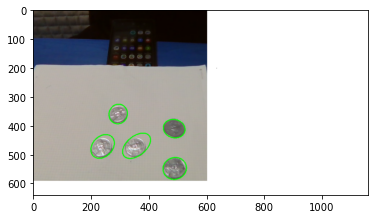

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
cap = cv2.VideoCapture(0)
img = cv2.imread('coin.png')
def run_main():
#     cap.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, 1280)
#     cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, 720)
    while(True):
        ret, frame = cap.read()
        roi = frame[0:500, 0:500]
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
        thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY_INV, 11, 1)
        kernel = np.ones((3, 3), np.uint8)
        closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
        kernel, iterations=4)
        cont_img = closing.copy()
        contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                                               cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area < 2000 or area > 4000:
                continue
            if len(cnt) < 5:
                continue
            ellipse = cv2.fitEllipse(cnt)
            cv2.ellipse(roi, ellipse, (0,255,0), 2)
        cv2.imshow("Morphological Closing", closing)
        cv2.imshow("Adaptive Thresholding", thresh)
        cv2.imshow('Contours', roi)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
plt.imshow(img)
plt.show
if __name__ == "__main__":
    run_main()